# Valorant

## import data

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np

df = pd.read_csv('valorant-stats.csv')

## calculate mean & std

In [3]:
df['Wall Penetration'] = df['Wall Penetration'].replace(['Low', 'Medium', 'High'], [1, 2, 3]).infer_objects(copy=False)
df['Weapon Type'] = df['Weapon Type'].replace(['Sidearm'], ['pistol'])
print("df.shape:", df.shape,'\n')

print("槍枝初始數據：")
display(df)
df_std_values = df.iloc[:, 2:].std()

print("各特徵平均與標準差：")
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

df.shape: (17, 15) 

槍枝初始數據：


,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,pistol,0,6.75,1,12,78,26,22,78,26,22,66,22,18
1,Shorty,pistol,200,3.30,1,2,36,12,10,24,8,6,9,3,2
2,Frenzy,pistol,400,10.00,1,13,78,26,22,63,21,17,63,21,17
3,Ghost,pistol,500,6.75,2,15,105,33,26,88,25,21,88,25,21
4,Sheriff,pistol,800,4.00,3,6,160,55,47,160,55,47,145,50,43
5,Stinger,SMG,1000,18.00,1,20,67,27,23,62,25,21,62,25,21
6,Spectre,SMG,1600,13.33,2,30,78,26,22,66,22,18,66,22,18
7,Bulldog,Rifle,2100,9.15,2,24,116,35,30,116,35,30,116,35,30
8,Guardian,Rifle,2500,6.50,2,12,195,65,49,195,65,49,195,65,49
9,Phantom,Rifle,2900,11.00,2,30,156,39,33,140,35,30,124,31,26


各特徵平均與標準差：


,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
mean,1629.41,7.46,1.94,21.24,114.00,43.59,36.41,107.76,41.47,34.59,101.71,39.24,32.71
std,1232.76,4.78,0.75,23.82,63.30,34.48,29.01,67.10,35.71,30.10,69.68,36.71,30.88


## plot `std` bar plot

<Axes: title={'center': 'each category "std" distribution'}>

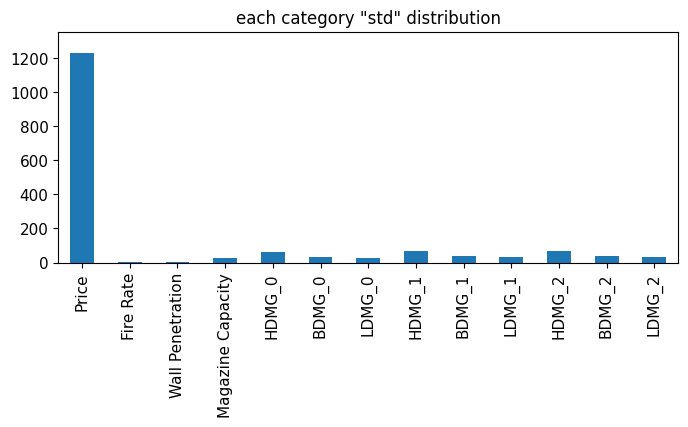

In [4]:
df_std_values.plot(kind = 'bar',         
                    title = 'each category "std" distribution',
                    ylim = [0,  max(df_std_values)*1.1],        
                    rot = 90, fontsize = 11, figsize = (8,3))

## 如果不做標準化，PCA的結果

In [5]:
no_stand = df.iloc[:, 2:]

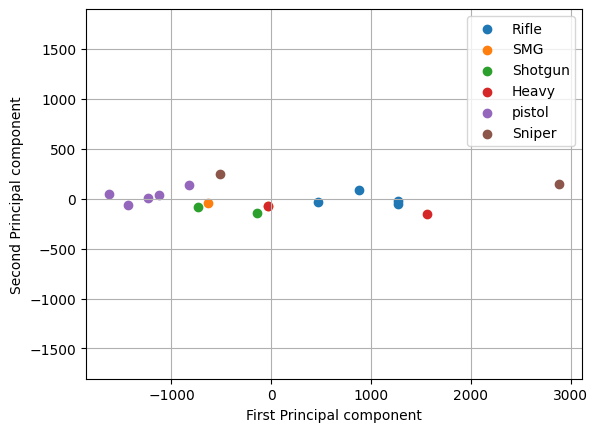

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

no_stand_PCA = pca.fit_transform(no_stand)  # (n_samples, n_components)

label = list(set(df['Weapon Type']))
for i in label:
  plt.scatter(no_stand_PCA[df['Weapon Type']==i, 0], no_stand_PCA[df['Weapon Type']==i, 1], label=i)


plt.legend()
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')
plt.axis('equal')
plt.grid()

In [7]:
pca_eigen_vector = np.array(pca.components_)

df_pc = pd.DataFrame(pca_eigen_vector, columns=df.columns[2:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='Greys_r', axis=None)\
    .format("{:.2}")

,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
第一主成分,1.0,0.00014,0.00038,0.0074,0.032,0.016,0.014,0.034,0.017,0.015,0.035,0.018,0.015
第二主成分,-0.069,-0.02,0.0011,-0.11,0.45,0.24,0.2,0.47,0.25,0.21,0.5,0.26,0.21


## Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

# Take out feature
feature = df.iloc[:, 2:]  # (n_samples, n_features)

scaler = StandardScaler()
stand_feature = scaler.fit_transform(feature)

df.iloc[:, 2:] = stand_feature
test = df.iloc[:, 2:]
df_standardized = pd.DataFrame(stand_feature, columns=df.columns[2:])

print("正規化後槍枝數據：")
display(df.style\
        .format("{:.2f}", subset=df.columns[2:]))

print("各特徵平均與標準差：")
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

正規化後槍枝數據：


,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,pistol,-1.36,-0.15,-1.30,-0.40,-0.59,-0.53,-0.51,-0.46,-0.45,-0.43,-0.53,-0.48,-0.49
1,Shorty,pistol,-1.20,-0.90,-1.30,-0.83,-1.27,-0.94,-0.94,-1.29,-0.97,-0.98,-1.37,-1.02,-1.02
2,Frenzy,pistol,-1.03,0.55,-1.30,-0.36,-0.59,-0.53,-0.51,-0.69,-0.59,-0.60,-0.57,-0.51,-0.52
3,Ghost,pistol,-0.94,-0.15,0.08,-0.27,-0.15,-0.32,-0.37,-0.30,-0.48,-0.47,-0.20,-0.40,-0.39
4,Sheriff,pistol,-0.69,-0.75,1.46,-0.66,0.75,0.34,0.38,0.80,0.39,0.43,0.64,0.30,0.34
5,Stinger,SMG,-0.53,2.27,-1.30,-0.05,-0.77,-0.50,-0.48,-0.70,-0.48,-0.47,-0.59,-0.40,-0.39
6,Spectre,SMG,-0.02,1.27,0.08,0.38,-0.59,-0.53,-0.51,-0.64,-0.56,-0.57,-0.53,-0.48,-0.49
7,Bulldog,Rifle,0.39,0.36,0.08,0.12,0.03,-0.26,-0.23,0.13,-0.19,-0.16,0.21,-0.12,-0.09
8,Guardian,Rifle,0.73,-0.21,0.08,-0.40,1.32,0.64,0.45,1.34,0.68,0.49,1.38,0.72,0.54
9,Phantom,Rifle,1.06,0.76,0.08,0.38,0.68,-0.14,-0.12,0.50,-0.19,-0.16,0.33,-0.23,-0.22


各特徵平均與標準差：


,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03


<Axes: title={'center': 'each category "std" distribution'}>

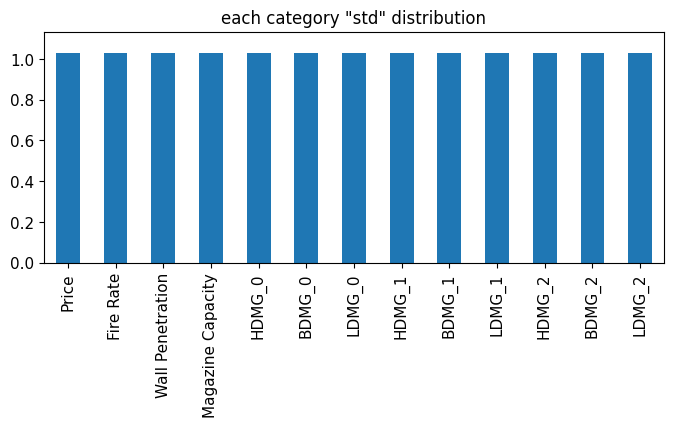

In [10]:
df_standardized.std().plot(kind = 'bar',         
                        title = 'each category "std" distribution',
                        ylim = [0, max(df_standardized.std())*1.1],        
                        rot = 90, fontsize = 11, figsize = (8,3))

# Starting PCA

## 2D PCA

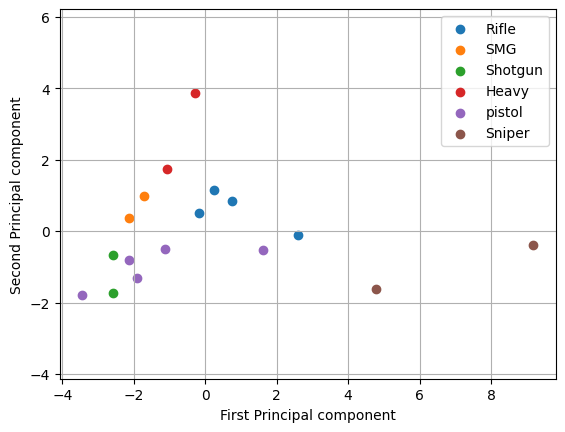

In [11]:
n_components = 2
random_state = 9527

pca_2d = PCA(n_components=n_components, 
          random_state=random_state)

PCA_2D = pca_2d.fit_transform(stand_feature)  

label = list(set(df['Weapon Type']))
for i in label:
  plt.scatter(PCA_2D[df['Weapon Type']==i, 0], PCA_2D[df['Weapon Type']==i, 1], label=i)


plt.legend()
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')
plt.axis('equal')
plt.grid()

In [12]:
PCA_eigenvector_2D = np.array(pca_2d.components_)

df_pc = pd.DataFrame(PCA_eigenvector_2D, columns=df.columns[2:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='Greys_r', axis=None)\
    .format("{:.2}")

,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
第一主成分,0.21,-0.13,0.19,-0.04,0.31,0.32,0.32,0.31,0.32,0.32,0.31,0.32,0.32
第二主成分,0.4,0.47,0.41,0.66,0.014,-0.064,-0.063,0.037,-0.047,-0.044,0.029,-0.048,-0.048


## 主成分中的方差比例

In [13]:
pca_10d = PCA(10, random_state=random_state)
pca_10d.fit(stand_feature)
print(np.round(pca_10d.explained_variance_ratio_, 2))

[0.73 0.15 0.05 0.03 0.02 0.01 0.   0.   0.   0.  ]


## 3D PCA

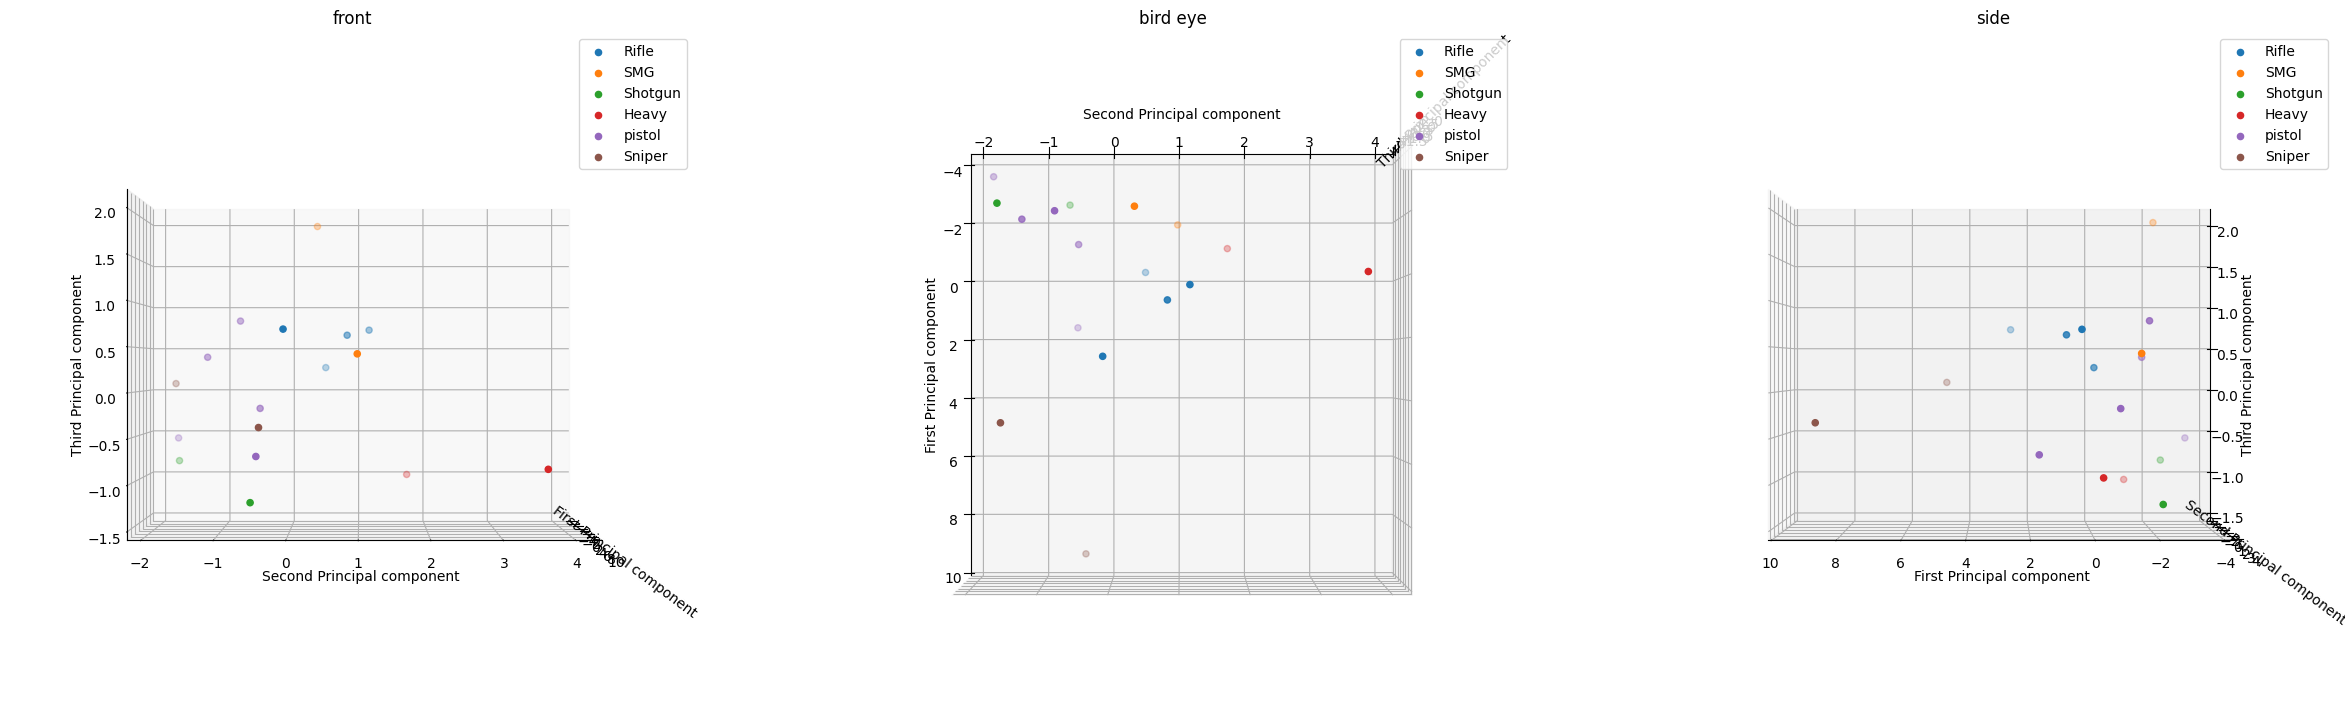

In [14]:
from mpl_toolkits.mplot3d import Axes3D

n_components = 3
random_state = 9527

fig, axes = plt.subplots(1, 3, figsize=(30, 10),subplot_kw={'projection': '3d'})

pca_3d = PCA(n_components=n_components, 
          random_state=random_state)

PCA_3D = pca_3d.fit_transform(stand_feature) 
label = list(set(df['Weapon Type']))

def plot_3D(ax, yaw ,rotate, title):
  for i in label:
    ax.scatter(PCA_3D[df['Weapon Type']==i, 0], PCA_3D[df['Weapon Type']==i, 1],PCA_3D[df['Weapon Type']==i, 2], label=i)
    ax.legend(loc='upper right')
    ax.set_title(title)
    ax.set_xlabel('First Principal component')
    ax.set_ylabel('Second Principal component')
    ax.set_zlabel('Third Principal component')
    ax.view_init(yaw, rotate)

plot_3D(axes[0], 0, 0, 'front')
plot_3D(axes[1], 90, 0, 'bird eye')
plot_3D(axes[2], 0, 90, 'side')
plt.show()

In [15]:
PCA_eigenvector_3D = np.array(pca_3d.components_)

df_pc = pd.DataFrame(PCA_eigenvector_3D, columns=df.columns[2:])
df_pc.index = [f"第{c}主成分" for c in['一', '二','三']]
df_pc.style\
    .background_gradient(cmap='Greys_r', axis=None)\
    .format("{:.2}")

,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
第一主成分,0.21,-0.13,0.19,-0.04,0.31,0.32,0.32,0.31,0.32,0.32,0.31,0.32,0.32
第二主成分,0.4,0.47,0.41,0.66,0.014,-0.064,-0.063,0.037,-0.047,-0.044,0.029,-0.048,-0.048
第三主成分,-0.035,0.72,-0.56,-0.17,0.2,-0.013,-0.022,0.19,-0.01,-0.022,0.24,0.041,0.024


## 1D PCA

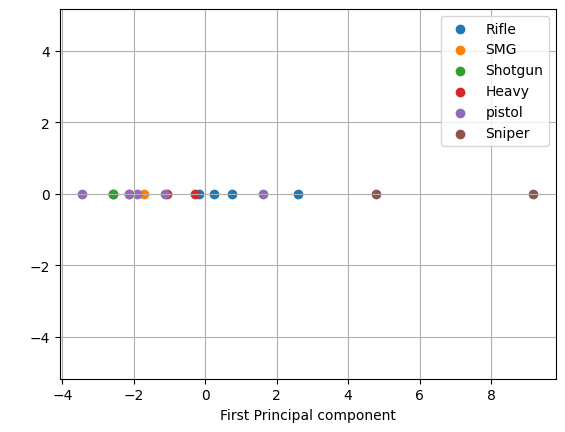

In [16]:
n_components = 1
random_state = 9527

pca_1d = PCA(n_components=n_components, 
          random_state=random_state)

PCA_1D = pca_1d.fit_transform(stand_feature)

label = list(set(df['Weapon Type']))
for i in label:
  plt.scatter(PCA_1D[df['Weapon Type']==i, 0], [0]*len(PCA_1D[df['Weapon Type']==i, 0]), label=i)

plt.legend()
plt.xlabel('First Principal component')
plt.ylabel(' ')
plt.axis('equal')
plt.grid()

In [17]:
PCA_eigenvector_1D = np.array(pca_1d.components_)

df_pc = pd.DataFrame(PCA_eigenvector_1D, columns=df.columns[2:])
df_pc.index = [f"第一主成分"]
df_pc.style\
    .background_gradient(cmap='Greys_r', axis=None)\
    .format("{:.2}")

,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
第一主成分,0.21,-0.13,0.19,-0.04,0.31,0.32,0.32,0.31,0.32,0.32,0.31,0.32,0.32


# Try to predict

## 匯入新槍枝參數

In [23]:
df_pred = pd.read_csv('valorant-stats.csv')
outlaw =  pd.Series(["Outlaw", "Sniper", 2400, 2.75, 3, 2, 238, 140, 119, 238, 140, 119, 238, 140, 119],
                index=["Name", "Weapon Type", "Price", "Fire Rate", "Wall Penetration", "Magazine Capacity", "HDMG_0", "BDMG_0", "LDMG_0", "HDMG_1", "BDMG_1", "LDMG_1", "HDMG_2", "BDMG_2", "LDMG_2"])

df_pred = pd.concat([df_pred, outlaw.to_frame().T], ignore_index=True)
df_pred['Wall Penetration'] = df_pred['Wall Penetration'].replace(['Low', 'Medium', 'High'], [1, 2, 3]).infer_objects(copy=False)
df_pred['Weapon Type'] = df_pred['Weapon Type'].replace(['Sidearm'], ['pistol'])

display (df_pred.iloc[17])

C:\Users\Win\AppData\Local\Temp\ipykernel_5180\2096036088.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pred['Wall Penetration'] = df_pred['Wall Penetration'].replace(['Low', 'Medium', 'High'], [1, 2, 3]).infer_objects(copy=False)


Name                 Outlaw
Weapon Type          Sniper
Price                  2400
Fire Rate              2.75
Wall Penetration          3
Magazine Capacity         2
HDMG_0                  238
BDMG_0                  140
LDMG_0                  119
HDMG_1                  238
BDMG_1                  140
LDMG_1                  119
HDMG_2                  238
BDMG_2                  140
LDMG_2                  119
Name: 17, dtype: object

## 將新槍枝與之前的參數一起進行標準化，提取新槍枝標準化後的參數

In [21]:
from sklearn.preprocessing import LabelEncoder

pred_feature = df_pred.iloc[:, 2:] 

scaler = StandardScaler()
stand_pred_feature = scaler.fit_transform(pred_feature)

df_pred.iloc[:, 2:] = stand_pred_feature

train_label = df_pred.iloc[0:17,1]
test_merge = df_pred.iloc[17,2:]
test_label = df_pred.iloc[17,1]
test_label = [test_label]
display (test_merge)

le = LabelEncoder()
train_label = le.fit_transform(train_label)
test_label = le.transform(test_label)

Price                0.619076
Fire Rate           -0.960665
Wall Penetration     1.341641
Magazine Capacity   -0.793678
HDMG_0               1.771974
BDMG_0               2.316763
LDMG_0               2.345401
HDMG_1               1.758599
BDMG_1               2.295863
LDMG_1                2.32159
HDMG_2                1.76968
BDMG_2               2.287792
LDMG_2               2.315975
Name: 17, dtype: object

## 將新槍枝的參數投影到主成分空間、利用LogisticRegression進行預測

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 投影
X_test_pca = pca_2d.transform(test_merge.values.reshape(1, -1))
#邏輯回歸模型
classifier = LogisticRegression()
classifier.fit(PCA_2D, train_label)
#預測
y_pred = classifier.predict(X_test_pca)
y_pred = [y_pred]
accuracy = accuracy_score(test_label, y_pred)
print(f"分類準確率: {accuracy * 100:.2f}%")

分類準確率: 100.00%


## 劃出決策圖

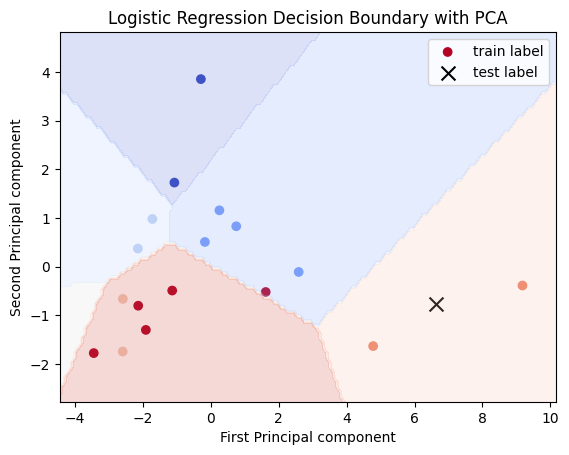

In [25]:
# 標註原始數據 & 測試數據
plt.scatter(PCA_2D[:, 0], PCA_2D[:, 1], c=train_label, cmap='coolwarm', label='train label')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='black', marker='x', s=100, label='test label')

# 建立網格，用於決策邊界的可視化
x_min, x_max = PCA_2D[:, 0].min() - 1, PCA_2D[:, 0].max() + 1
y_min, y_max = PCA_2D[:, 1].min() - 1, PCA_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 預測網格上的每個點
predict_each_dot = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
predict_each_dot = predict_each_dot.reshape(xx.shape)

# 繪製決策邊界
plt.contourf(xx, yy, predict_each_dot, alpha=0.2, cmap='coolwarm')

plt.title('Logistic Regression Decision Boundary with PCA')
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')
plt.legend()
plt.show()